<a href="https://colab.research.google.com/github/Goshikhar23/DL-back-to-the-basics/blob/master/SigmoidNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sigmoid Neuron

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Plotting sigmoid

$S_{w,b}(x)=\frac{1}{1+e^-{(wx+b)}}$

In [ ]:
def sigmoid(x, w, b):
  return 1/(1+np.exp(-(w*x+b)))

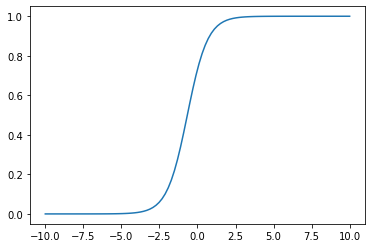

In [ ]:
w= 1.5    #@param {type: "slider", min: -2, max: 2, step: 0.1}
b= 1      #@param {type: "slider", min: -2, max: 2, step: 0.1}
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)
plt.plot(X, Y)
plt.show()

3D Sigmoid

$S_{w_1,w_2,b}(x_1, x_2)=\frac{1}{1+e^-{(w_1x_1+w_2x_2+b)}}$

In [ ]:
def sigmoid_3D(x1, x2, w1, w2, b):
  return 1/(1+np.exp(-(w1*x1+w2*x2+b)))

In [ ]:
w1 = 2
w2 = 3
b = 1
X1 = np.linspace(-10,10,100)
X2 = np.linspace(-10,10,100)
# we want all combinations of x1 and x2 to plot
XX1, XX2 = np.meshgrid(X1, X2)
print(X1.shape, X2.shape, XX1.shape, XX2.shape)


(100,) (100,) (100, 100) (100, 100)


In [ ]:
Y = sigmoid_3D(XX1, XX2, w1, w2, b)

In [ ]:
from mpl_toolkits import mplot3d

Text(0.5, 0, 'y')

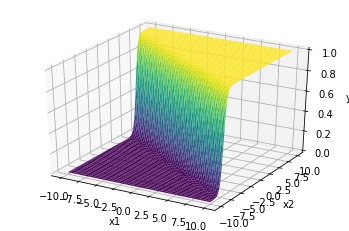

In [ ]:
fig = plt.figure()
ax= plt.axes(projection = '3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

#ax.view_init(0,180)

## Computing loss for a given dataset

In [ ]:
w_unknown = 0.5
b_unknown = 0.25

X= np.random.random(25)*20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

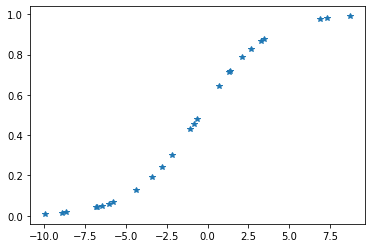

In [ ]:
plt.plot(X, Y, '*')
plt.show()

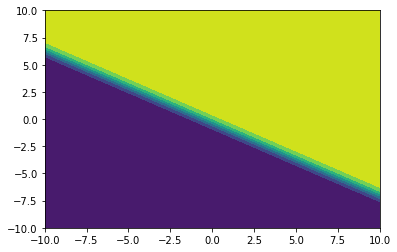

In [ ]:
plt.contourf(XX1,XX2,Y)
plt.show()

In [ ]:
def compute_loss(X, Y, w_est, b_est):
  loss =0

  for x, y in zip(X, Y):
    loss+= (y- sigmoid(x, w_est, b_est))**2
  return loss

In [ ]:
W = np.linspace(0, 1, 100)
B = np.linspace(-1, 1, 100)
WW, BB = np.meshgrid(W, B)



In [ ]:
WW.shape

(100, 100)

In [ ]:
Loss = np.zeros(WW.shape)

In [ ]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i, j]= compute_loss(X, Y, WW[i, j], BB[i, j])

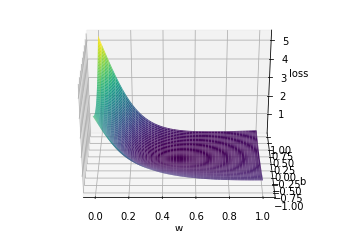

In [ ]:
fig = plt.figure()
ax= plt.axes(projection = '3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss')

ax.view_init(30, 270)

negative w is not a good choice for loss computation(changing value of w)

In [ ]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij- i*Loss.shape[1])

In [ ]:
print(i, j)

62 50


In [ ]:
print(WW[i, j], BB[i, j])

0.5050505050505051 0.2525252525252526


# Sigmoid Neuron Class

In [ ]:
class SigmoidNeuron():

  def __init__(self):
    self.w = None
    self.b= None
  
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b

  def sigmoid(self,x):
    return 1/(1+np.exp(-x))

  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x

  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) 
  
  def fit(self, X, Y, epochs = 1, lr = 1, initialise=True):

    # initialise w and b
    if(initialise):
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0

    for i in range(epochs):
      dw=0
      db=0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)

      self.w -= lr*dw
      self.b -= lr*db


## Fit for toy data

In [ ]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [3, 1.25], [2, 4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

In [ ]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.25, True)

In [ ]:
def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10,10,100)
  X2 = np.linspace(-10,10,100)
  # we want all combinations of x1 and x2 to plot
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1, XX2, YY)
  ax.scatter(X[:, 0], X[:, 1], c=Y)
  ax.plot


[[ 0.79867958 -1.20474357]] [-0.0031656]
[[ 0.75705465 -1.12017756]] [-0.00537007]
[[ 0.71748446 -1.03441904]] [-0.0068339]
[[ 0.67869293 -0.94968402]] [-0.00816057]
[[ 0.63858317 -0.86930912]] [-0.01030578]
[[ 0.59501777 -0.7969199 ]] [-0.014256]
[[ 0.54720768 -0.73485796]] [-0.0204505]
[[ 0.49677562 -0.68311293]] [-0.0283553]
[[ 0.44743254 -0.64004208]] [-0.03663717]
[[ 0.40339678 -0.60411948]] [-0.04381892]


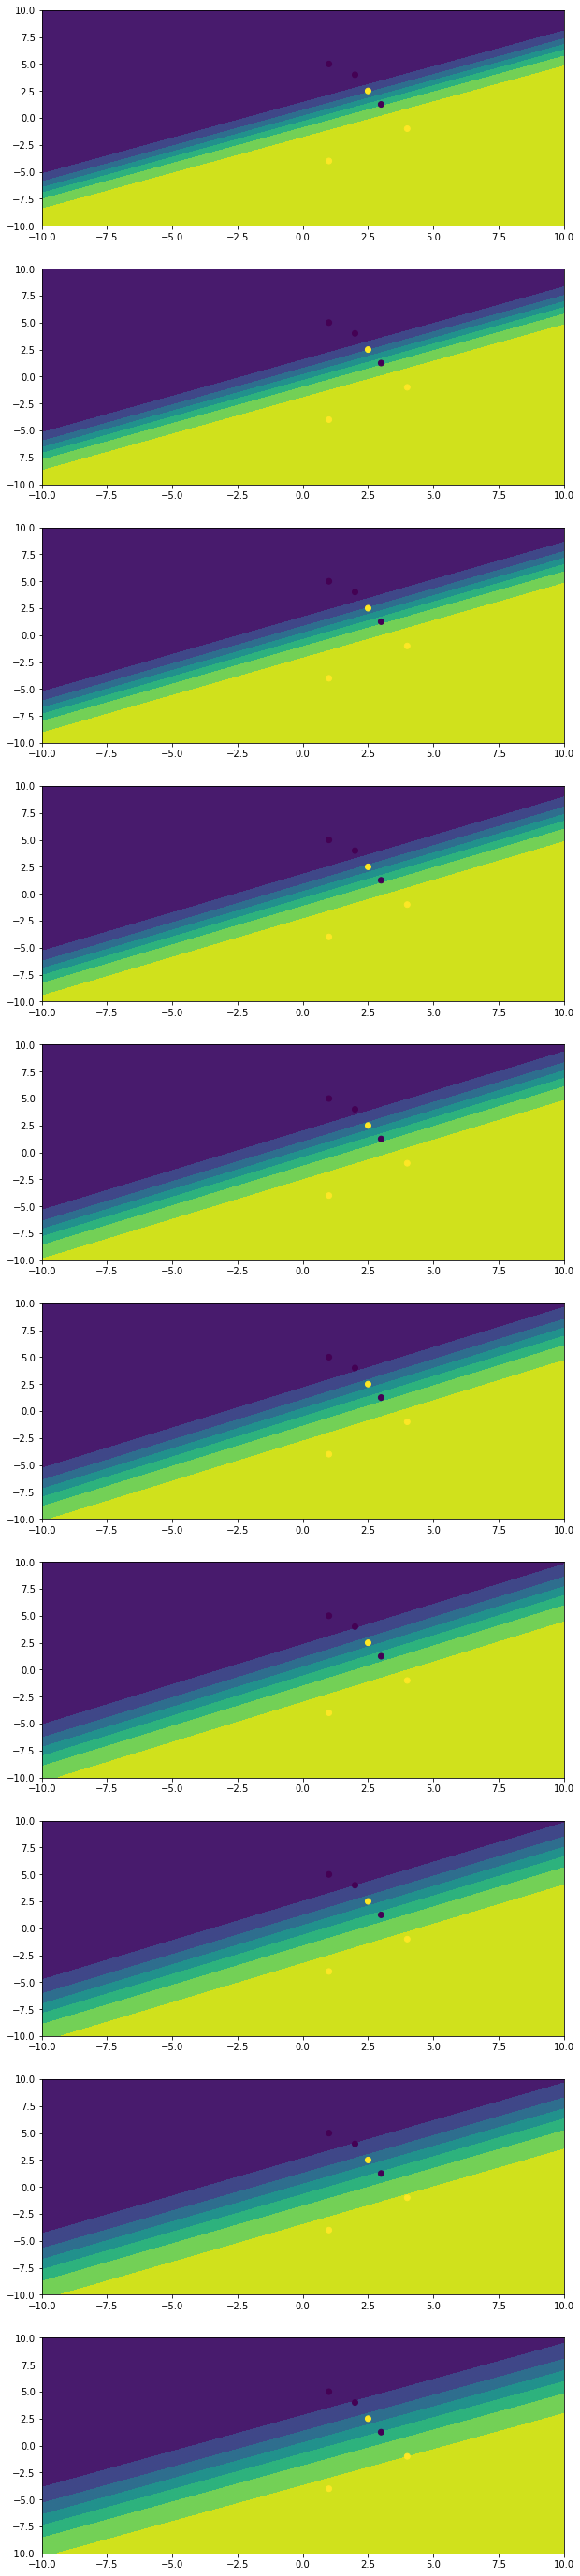

In [ ]:
sn.fit(X, Y, 1, 0.5, True)
N=10
plt.figure(figsize=(10, N*5))
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1, i+1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.5, False)
